In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Load the dataset
df = pd.read_csv('MTA_Daily_Ridership_Data__2020_-_2025.csv')

# Display the first few rows of the dataset
df.head() 

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,01/01/2021,613692,0.29,378288,0.41,28977,0.35,14988,0.17,5960,0.44,445950,0.65,805,0.29
1,01/01/2022,1027918,0.38,350845,0.29,33980,0.35,30341,0.23,4904,0.34,498515,0.65,1262,0.31
2,01/01/2023,1675507,0.80,475226,0.52,67722,0.82,66309,0.73,11476,0.85,737533,1.08,1771,0.65
3,01/01/2024,1648734,0.79,455965,0.50,82811,1.00,73957,0.82,9165,0.68,730489,1.07,2018,0.74
4,01/01/2025,1779352,0.85,495795,0.54,90318,1.09,74690,0.83,12417,0.92,678296,0.99,2040,0.75


In [5]:
# Selecting relevant columns
df_forecast = df.loc[:, [
    'Date',
    'Subways: Total Estimated Ridership',
    'Buses: Total Estimated Ridership',
    'LIRR: Total Estimated Ridership',
    'Metro-North: Total Estimated Ridership',
    'Staten Island Railway: Total Estimated Ridership'
]].copy() 

# Rename columns
df_forecast.columns = ['Date', 'Subway', 'Bus', 'LIRR', 'MetroNorth', 'StatenIsland']

df_forecast.head()

,Date,Subway,Bus,LIRR,MetroNorth,StatenIsland
0,01/01/2021,613692,378288,28977,14988,805
1,01/01/2022,1027918,350845,33980,30341,1262
2,01/01/2023,1675507,475226,67722,66309,1771
3,01/01/2024,1648734,455965,82811,73957,2018
4,01/01/2025,1779352,495795,90318,74690,2040


In [6]:
#Check for null
print("Missing values per column:")
print(df_forecast.isnull().sum())

Missing values per column:
Date            0
Subway          0
Bus             0
LIRR            0
MetroNorth      0
StatenIsland    0
dtype: int64


In [7]:
#Covert date to datetime
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

df_forecast.head()

,Date,Subway,Bus,LIRR,MetroNorth,StatenIsland
0,2021-01-01,613692,378288,28977,14988,805
1,2022-01-01,1027918,350845,33980,30341,1262
2,2023-01-01,1675507,475226,67722,66309,1771
3,2024-01-01,1648734,455965,82811,73957,2018
4,2025-01-01,1779352,495795,90318,74690,2040


In [8]:
#Set 'Date' as the index
df_forecast.set_index('Date', inplace=True)


#Sort data by date
df_forecast.sort_index(inplace=True)


df_forecast.head()

,Subway,Bus,LIRR,MetroNorth,StatenIsland
Date,,,,,
2020-03-01,2212965,984908,86790,55825,1636
2020-03-02,5329915,2209066,321569,180701,17140
2020-03-03,5481103,2228608,319727,190648,17453
2020-03-04,5498809,2177165,311662,192689,17136
2020-03-05,5496453,2244515,307597,194386,17203


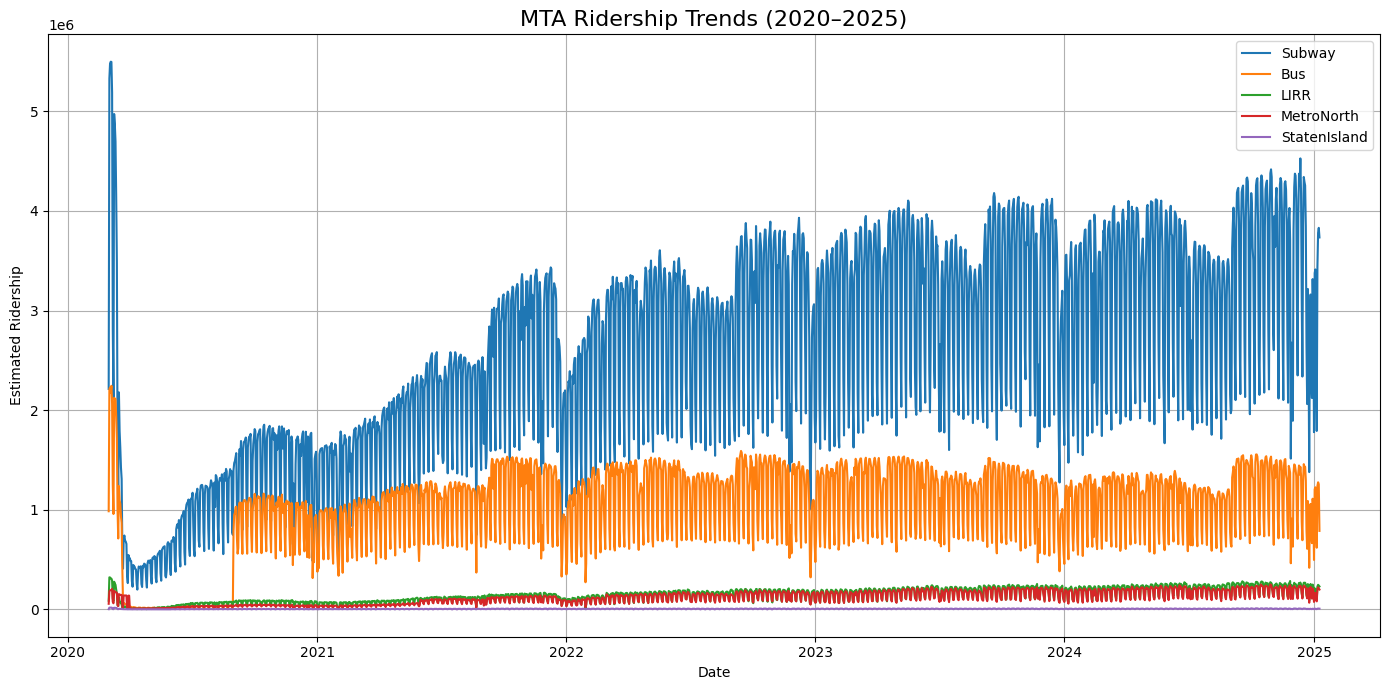

In [9]:
# Set plot size and style
plt.figure(figsize=(14, 7))

# Plot each transportation mode
plt.plot(df_forecast['Subway'], label='Subway')
plt.plot(df_forecast['Bus'], label='Bus')
plt.plot(df_forecast['LIRR'], label='LIRR')
plt.plot(df_forecast['MetroNorth'], label='MetroNorth')
plt.plot(df_forecast['StatenIsland'], label='StatenIsland')

# Add title and labels
plt.title('MTA Ridership Trends (2020–2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Estimated Ridership')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


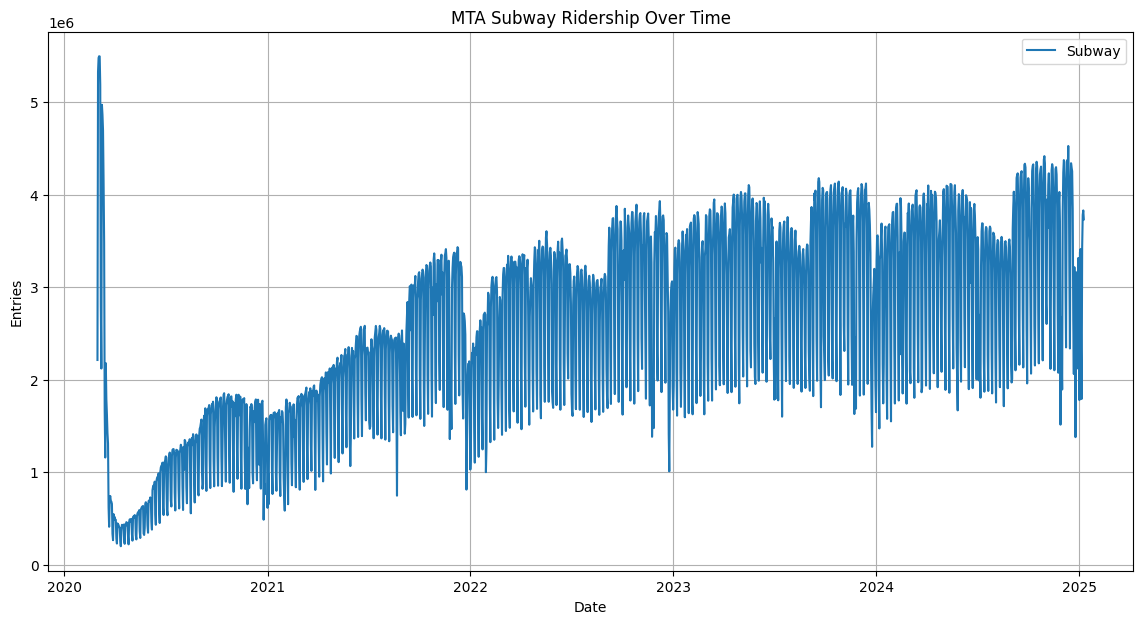

In [10]:
#Visualize Subway Trends
# Set plot size and style
plt.figure(figsize=(14, 7))

#Add labels
plt.plot(df_forecast['Subway'], label='Subway')
plt.title('MTA Subway Ridership Over Time')
plt.ylabel("Entries")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
#Get Subway data from data forecast
subway_df = df_forecast[['Subway']]

#Split the data for training and testing
#Number of rows
n = len(subway_df)

#80% for training
size = int(n*0.8)

#Split the data
train = subway_df.iloc[:size]
test = subway_df.iloc[size:]

In [12]:
from statsmodels.tsa.stattools import adfuller

#Runs Adf test
result = adfuller(train['Subway']) 

print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -2.014709719230118
p-value: 0.28016087630726183


In [13]:
#Since the time series is not stationary, then we must difference
train_diff = train.diff().dropna()
result2 = adfuller(train_diff['Subway'])

print('ADF Statistic:', result2[0])
print('p-value:', result2[1])

ADF Statistic: -10.54734082790228
p-value: 8.347092882765984e-19


In [14]:
#Make the Model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1, 2, 1))  # (p, d, q)
model_fit = model.fit()

print(model_fit.summary())

/home/cloudycane/mta_forecasting/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/cloudycane/mta_forecasting/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/cloudycane/mta_forecasting/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Subway   No. Observations:                 1420
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -21012.833
Date:                Fri, 29 Aug 2025   AIC                          42031.667
Time:                        16:21:12   BIC                          42047.438
Sample:                    03-01-2020   HQIC                         42037.559
                         - 01-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1196      0.057      2.096      0.036       0.008       0.231
ma.L1         -0.9992      0.036    -28.139      0.000      -1.069      -0.930
sigma2      6.037e+11    5.5e-14    1.1e+25      0.0

In [15]:
#Check the last date in the training data set
print(train.index.max()) #2024-01-19

forecast = model_fit.forecast(steps=len(test))

print(forecast)

#Print the number of rows in test
print(len(test))

2024-01-19 00:00:00
2024-01-20    3.120757e+06
2024-01-21    3.115797e+06
2024-01-22    3.116901e+06
2024-01-23    3.118731e+06
2024-01-24    3.120647e+06
                  ...     
2025-01-05    3.789616e+06
2025-01-06    3.791544e+06
2025-01-07    3.793472e+06
2025-01-08    3.795400e+06
2025-01-09    3.797328e+06
Freq: D, Name: predicted_mean, Length: 356, dtype: float64
356


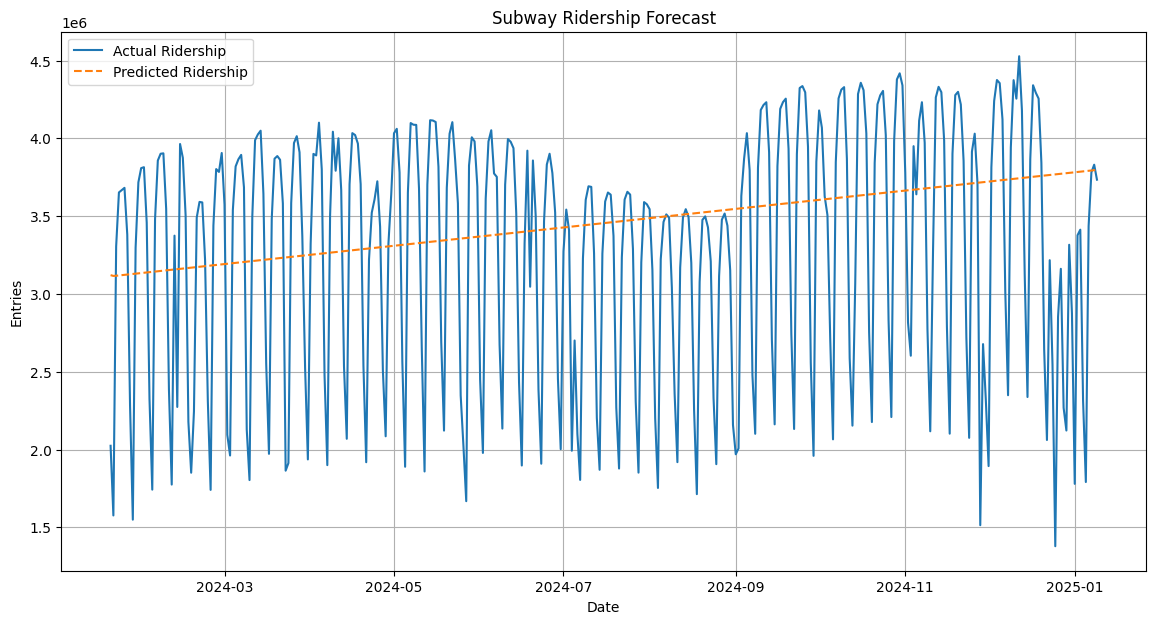

In [16]:
#Visualize the Forecast
# Set plot size and style
plt.figure(figsize=(14, 7))

#Add labels
plt.plot(test['Subway'][:], label='Actual Ridership')
plt.plot(forecast.index, forecast, label='Predicted Ridership', linestyle='--')
plt.title("Subway Ridership Forecast")
plt.xlabel("Date")
plt.ylabel("Entries")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
#Forecast specific date

#Get the last date
last_date = train.index.max() #2024-01-19

#Target Date
target_date = pd.to_datetime('2024-06-23')

#Calculate days difference
date_diff = (target_date - last_date).days

print("Days to forecast:", date_diff)

Days to forecast: 156


In [18]:
#Forecasting
specific_forecast = model_fit.forecast(steps=len(train))

# Extract the prediction for June 6, 2024
prediction = specific_forecast.loc[target_date]

print(f"Predicted subway ridership on {target_date.date()}: {prediction:,.0f}")

Predicted subway ridership on 2024-06-23: 3,411,754


In [19]:
actual_value = test.loc[target_date, 'Subway']
print(f"Actual subway ridership on {target_date.date()}: {actual_value:,.0f}")

Actual subway ridership on 2024-06-23: 1,908,786


In [20]:
#Calculate the error
error = prediction - actual_value
abs(error)

print(f"Absolute error: {error:,.0f}")

Absolute error: 1,502,968


In [21]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

forecast.index = test.index

mae = mean_absolute_error(test['Subway'], forecast)
print(f"MAE: {mae:,.0f}")

#Get the Subway Ridership on test
avg_subway = test['Subway'].mean()
print(f"Average Subway Ridership (Test Set): {avg_subway:,.0f}")

#Calculate MAPE
mape = np.mean(np.abs((test['Subway'] - forecast) / test['Subway'])) * 100
print(f"MAPE: {mape:.2f}%")

MAE: 681,050
Average Subway Ridership (Test Set): 3,274,979
MAPE: 26.57%


In [22]:
#Make the another model, use 7 for MA and AR
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(7, 2, 7))  # (p, d, q)
model_fit = model.fit()

print(model_fit.summary())

/home/cloudycane/mta_forecasting/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/cloudycane/mta_forecasting/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/cloudycane/mta_forecasting/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Subway   No. Observations:                 1420
Model:                 ARIMA(7, 2, 7)   Log Likelihood              -19908.223
Date:                Fri, 29 Aug 2025   AIC                          39846.446
Time:                        16:21:16   BIC                          39925.302
Sample:                    03-01-2020   HQIC                         39875.906
                         - 01-19-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2559      0.024    -51.908      0.000      -1.303      -1.209
ar.L2         -1.2531      0.023    -55.526      0.000      -1.297      -1.209
ar.L3         -1.2519      0.024    -51.948      0.0

/home/cloudycane/mta_forecasting/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
#Forecast 727 model
forecast = model_fit.forecast(steps=len(test))

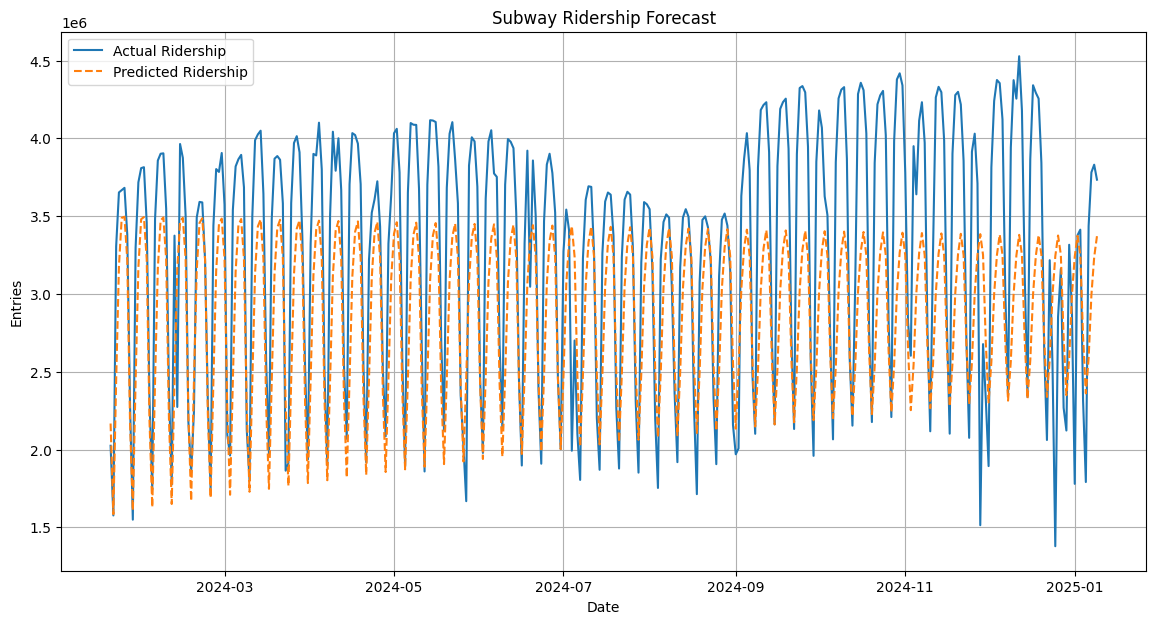

In [24]:
#Visualize the Forecast
# Set plot size and style
plt.figure(figsize=(14, 7))


#Add labels
plt.plot(test['Subway'][:], label='Actual Ridership')
plt.plot(forecast.index, forecast, label='Predicted Ridership', linestyle='--')
plt.title("Subway Ridership Forecast")
plt.xlabel("Date")
plt.ylabel("Entries")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
#Forecasting
specific_forecast = model_fit.forecast(steps=len(train))

# Extract the prediction for June 6, 2024
prediction = specific_forecast.loc[target_date]
print(f"Predicted subway ridership for June 6, 2024: {prediction:,.0f}")

Predicted subway ridership for June 6, 2024: 1,986,790


In [26]:
actual_value = test.loc[target_date, 'Subway']
print(f"Actual subway ridership on {target_date.date()}: {actual_value:,.0f}")

Actual subway ridership on 2024-06-23: 1,908,786


In [27]:
#Predict Ridership on Holidays

#Christmas
xmas_date = pd.to_datetime('2024-12-25')
prediction = specific_forecast.loc[xmas_date]
print(f"Predicted subway ridership on Christmas Day: {prediction:,.0f}")

#Independence Day
independence_date = pd.to_datetime('2024-7-04')
prediction = specific_forecast.loc[independence_date]
print(f"Predicted subway ridership on Independence Day: {prediction:,.0f}")

#Veteran' Day
vet_date = pd.to_datetime('2024-11-11')
prediction = specific_forecast.loc[vet_date]
print(f"Predicted subway ridership on Veteran's Day: {prediction:,.0f}")


Predicted subway ridership on Christmas Day: 3,241,657
Predicted subway ridership on Independence Day: 3,436,556
Predicted subway ridership on Veteran's Day: 2,549,972


In [28]:
#Actual Ridership

#Christmas
actual_value = test.loc[xmas_date, 'Subway']
print(f"Actual subway ridership on Christmas Day: {actual_value:,.0f}")

#Independence Day
actual_value = test.loc[independence_date, 'Subway']
print(f"Actual subway ridership on Independence Day: {actual_value:,.0f}")

#Veteran's Day
actual_value = test.loc[vet_date, 'Subway']
print(f"Actual subway ridership on Veteran's Day: {actual_value:,.0f}")

Actual subway ridership on Christmas Day: 1,378,374
Actual subway ridership on Independence Day: 1,992,244
Actual subway ridership on Veteran's Day: 3,277,617


In [29]:
#Calculate the error
error = prediction - actual_value
abs(error)

print(f"Absolute error: {error:,.0f}")

Absolute error: -727,645


In [30]:
forecast.index = test.index

mae = mean_absolute_error(test['Subway'], forecast)
print(f"MAE: {mae:,.0f}")

print(f"Average Subway Ridership (Test Set): {avg_subway:,.0f}")

#Calculate MAPE
mape = np.mean(np.abs((test['Subway'] - forecast) / test['Subway'])) * 100
print(f"MAPE: {mape:.2f}%")

MAE: 534,902
Average Subway Ridership (Test Set): 3,274,979
MAPE: 15.78%


In [31]:
#Prophet Subway
#Reset the index for Subway train and test
sub_train = train.reset_index()
sub_test = test.reset_index()

#Rename columns
sub_train.columns = ['ds', 'y']
sub_test.columns = ['ds', 'y']

In [32]:
from prophet import Prophet

#Create a model
sub_model = Prophet()

#Add holiday
sub_model.add_country_holidays(country_name='US')

#Fit the model
sub_model.fit(sub_train)


16:21:17 - cmdstanpy - INFO - Chain [1] start processing
16:21:17 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
#Create future dataframes
sub_future = sub_model.make_future_dataframe(periods=len(sub_test), freq='d')

#Make the prediction
sub_forecast = sub_model.predict(sub_future)

sub_forecast.set_index('ds', inplace=True)

In [34]:
#Set ds as index
sub_test = sub_test.set_index('ds')
sub_train = sub_train.set_index('ds')

#Slice forecast to match test set only
sub_forecast_test = sub_forecast.loc[sub_test.index]

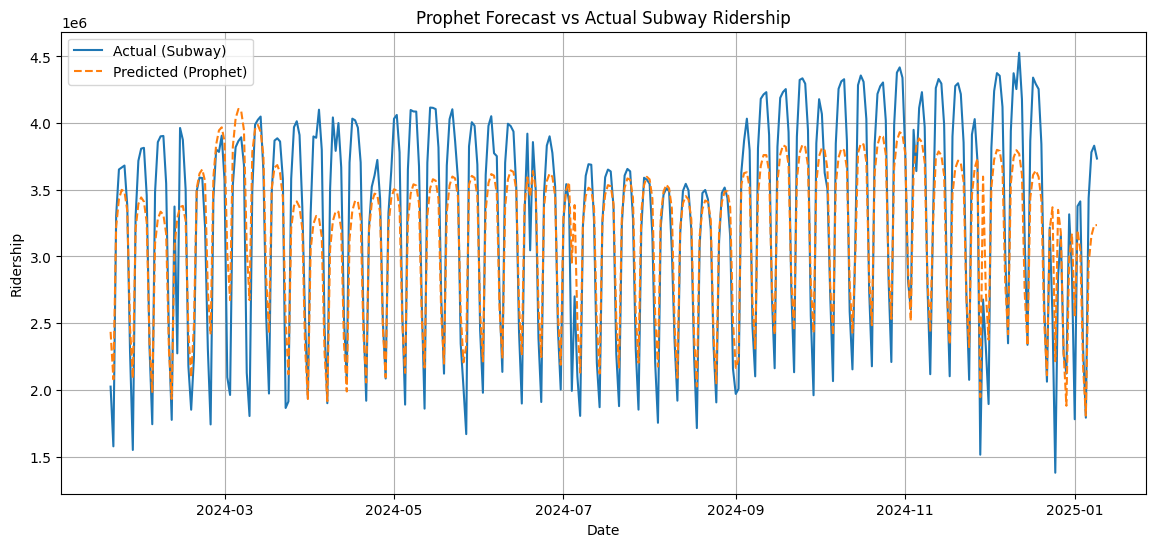

In [35]:
#Visualize the model: Comparing Predicted Values to Actual Values

plt.figure(figsize=(14, 6))

plt.plot(sub_test.index, sub_test['y'], label='Actual (Subway)')
plt.plot(sub_forecast_test.index, sub_forecast_test['yhat'], label='Predicted (Prophet)', linestyle='--')

plt.title("Prophet Forecast vs Actual Subway Ridership")
plt.xlabel("Date")
plt.ylabel("Ridership")
plt.legend()
plt.grid(True)
plt.show()

In [36]:
#Predicted Ridership on Holidays

#Christmas day
prediction = sub_forecast_test.loc[xmas_date, 'yhat']
print(f"Predicted subway ridership on Christmas Day (2024): {prediction:,.0f}")
    
#Independence Day
prediction = sub_forecast_test.loc[independence_date, 'yhat']
print(f"Predicted subway ridership on Independence Day (2024): {prediction:,.0f}")

#Veteran's day
prediction = sub_forecast_test.loc[vet_date, 'yhat']
print(f"Predicted subway ridership on Veteran's Day (2024): {prediction:,.0f}")


Predicted subway ridership on Christmas Day (2024): 2,214,380
Predicted subway ridership on Independence Day (2024): 2,953,830
Predicted subway ridership on Veteran's Day (2024): 3,246,661


In [37]:
# Make the Table

data = {
  'Holiday (2024)' : ['Christmas', 'Independence Day', "Veteran's day"],
  'ARIMA 727' : ["3,241,657", "3,436,556", "2,549,972"],
  'Prophet' : ["2,214,380", "2,953,830", "3,246,661"],
  'Actual Ridership' : ["1,378,374", "1,992,244", "3,277,617"]
  
}

df_data = pd.DataFrame(data)

markdown_table = df_data.to_markdown(index=False)
print(markdown_table)


| Holiday (2024)   | ARIMA 727   | Prophet   | Actual Ridership   |
|:-----------------|:------------|:----------|:-------------------|
| Christmas        | 3,241,657   | 2,214,380 | 1,378,374          |
| Independence Day | 3,436,556   | 2,953,830 | 1,992,244          |
| Veteran's day    | 2,549,972   | 3,246,661 | 3,277,617          |


In [38]:
mae = mean_absolute_error(sub_test['y'], sub_forecast_test['yhat'])

print(f"MAE: {mae:,.0f}")

#Mape
sub_mape_prophet = np.mean(
    np.abs((sub_test['y'] - sub_forecast_test['yhat']) / sub_test['y'].replace(0, np.nan))
) * 100

print(f"MAPE: {sub_mape_prophet:.2f}%")

MAE: 299,192
MAPE: 9.78%


In [39]:
first_week_march = sub_train.loc['2020-03-01':'2020-03-07']

#Pre-COVID Avg
sub_pre_covid_avg = first_week_march['y'].mean()
print(f"Subway Pre-COVID Avg (Mar 1–7): {sub_pre_covid_avg:,.0f}")

#Lowest Ridership
sub_lowest = sub_train['y'].rolling(window=7).mean().min()
print(f"Subway lowest 7-day average: {sub_lowest:,.0f}")

#Calculate the Drop Rate
sub_percent_drop = ((sub_pre_covid_avg - sub_lowest) / sub_pre_covid_avg) * 100
print(f"Subway Ridership Drop Rate: {sub_percent_drop:,.0f}%")

#Latest Avg (Last 7 days)
sub_latest_avg = sub_train['y'].tail(7).mean()
print(f"Subway Latest ridership: {sub_latest_avg:,.0f}")

#Calculate the Recovery Rate
sub_recovery = (sub_latest_avg - sub_lowest) / (sub_pre_covid_avg - sub_lowest) * 100
print(f"Subway Recovery Rate: {sub_recovery:,.0f}%")


Subway Pre-COVID Avg (Mar 1–7): 4,574,761
Subway lowest 7-day average: 353,271
Subway Ridership Drop Rate: 92%
Subway Latest ridership: 2,823,710
Subway Recovery Rate: 59%


In [40]:
# 10-year forecast
start_date = sub_train.index.max()
forecast_10yr = sub_forecast[(sub_forecast.index > start_date) & 
                             (sub_forecast.index <= start_date + pd.Timedelta(days=365*10))]

# 7-day rolling average
sub_forecast['yhat_7day_avg'] = sub_forecast['yhat'].rolling(window=7).mean()

# Get max 7-day average value 
max_pred_10yr = sub_forecast['yhat_7day_avg'].max()
print(f"Max 7-day average forecasted: {max_pred_10yr:,.0f}")

recovery_rate_10yr = (max_pred_10yr - sub_lowest) / (sub_pre_covid_avg - sub_lowest) * 100
print(f"Maximum 7-day average recovery rate (10 yrs): {recovery_rate_10yr:.1f}%")

Max 7-day average forecasted: 3,676,621
Maximum 7-day average recovery rate (10 yrs): 78.7%


In [41]:
#Prophet
bus_df = df.loc[:,['Date','Buses: Total Estimated Ridership']].copy()

#Turn date into datetime
bus_df['Date'] = pd.to_datetime(bus_df['Date'])

bus_df.dtypes

Date                                datetime64[ns]
Buses: Total Estimated Ridership             int64
dtype: object

In [42]:
#Rename
bus_df.columns = ['ds', 'y']

#Sort the data
bus_df = bus_df.sort_values('ds')

bus_df.head()

,ds,y
246,2020-03-01,984908
251,2020-03-02,2209066
256,2020-03-03,2228608
261,2020-03-04,2177165
266,2020-03-05,2244515


In [43]:
#Split the data for training and testing
n = len(bus_df)

#80% for training
size = int(n*0.8)

#Split data
bus_train = bus_df.iloc[:size]
bus_test = bus_df.iloc[size:]

In [44]:
#Create a model
bus_model = Prophet()

#Add holiday
bus_model.add_country_holidays(country_name='US')

#Fit the model to the train data set
bus_model.fit(bus_train)

16:21:18 - cmdstanpy - INFO - Chain [1] start processing
16:21:18 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
#Create future dataframes
bus_future = bus_model.make_future_dataframe(periods=len(bus_test), freq='d')

#Make the prediction
bus_forecast = bus_model.predict(bus_future)

bus_forecast.set_index('ds', inplace=True)

In [46]:
#Set ds as index
bus_test = bus_test.set_index('ds')
bus_train = bus_train.set_index('ds')

#Slice forecast to match test set only
bus_forecast_test = bus_forecast.loc[bus_test.index]

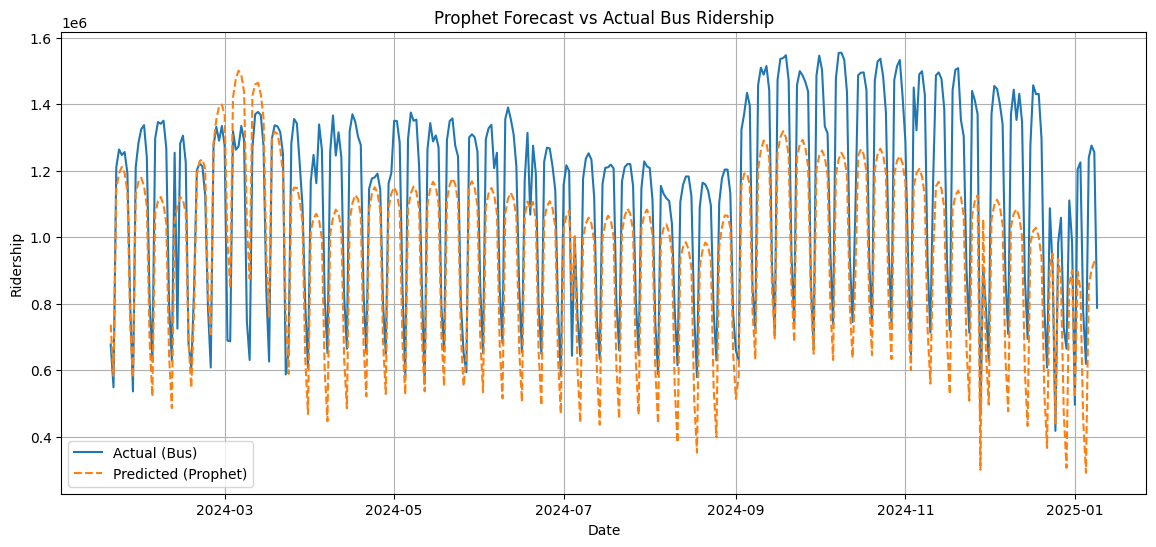

In [47]:
#Visualize the model: Comparing Predicted Values to Actual Values

plt.figure(figsize=(14, 6))

plt.plot(bus_test.index, bus_test['y'], label='Actual (Bus)')
plt.plot(bus_forecast_test.index, bus_forecast_test['yhat'], label='Predicted (Prophet)', linestyle='--')

plt.title("Prophet Forecast vs Actual Bus Ridership")
plt.xlabel("Date")
plt.ylabel("Ridership")
plt.legend()
plt.grid(True)
plt.show()

In [48]:
mae = mean_absolute_error(bus_test['y'], bus_forecast_test['yhat'])

print(f"MAE: {mae:,.0f}")

#Get Bus Ridership Avg on Test
bus_avg = bus_test['y'].mean()
print(f"Average daily ridership: {bus_avg:,.0f}")

#Calculate MAPE
bus_mape = np.mean(
    np.abs((bus_test['y'] - bus_forecast_test['yhat']) / bus_test['y'].replace(0, np.nan))
) * 100
print(f"MAPE: {bus_mape:.2f}%")

MAE: 177,594
Average daily ridership: 1,119,374
MAPE: 16.39%


In [49]:
#First week of March 
bus_first_week = bus_train.loc['2020-03-01':'2020-03-07']

#Pre-COVID Avg
bus_pre_covid_avg = bus_first_week['y'].mean()
print(f"Bus Pre-COVID Avg (Mar 1-7): {bus_pre_covid_avg:,.0f}")

#Lowest Ridership
bus_lowest = bus_train['y'].rolling(window=7).mean().min()
print(f"Bus lowest 7-day average: {bus_lowest:,.0f}")

#Calculate the Drop Rate
bus_drop_rate = ((bus_pre_covid_avg - bus_lowest) / bus_pre_covid_avg) * 100
print(f"Bus Ridership Drop Rate {bus_drop_rate:,.0f}%")

#Latest Avg (Last 7 days)
bus_latest_avg = bus_train['y'].tail(7).mean()
print(f"Bus Latest Average {bus_latest_avg:,.0f}")

#Calculate Current Recovery Rate
bus_recovery = (bus_latest_avg - bus_lowest) / (bus_pre_covid_avg - bus_lowest) * 100
print(f"Bus Recovery Rate: {bus_recovery:,.0f}%")


Bus Pre-COVID Avg (Mar 1-7): 1,880,013
Bus lowest 7-day average: 12,814
Bus Ridership Drop Rate 99%
Bus Latest Average 963,512
Bus Recovery Rate: 51%


In [50]:
#10-year forecast
start_date = bus_train.index.max()
forecast_10yr = bus_forecast[(bus_forecast.index > start_date) &
                             (bus_forecast.index <= start_date + pd.Timedelta(days=365*10))]

# 7-day rolling average
bus_forecast['yhat_7day_avg'] = bus_forecast['yhat'].rolling(window=7).mean()

# Get max 7-day average value 
max_pred_10yr = bus_forecast['yhat_7day_avg'].max()
print(f"Max 7-day average forecasted: {max_pred_10yr:,.0f}")

recovery_rate_10yr = (max_pred_10yr - bus_lowest) / (bus_pre_covid_avg - bus_lowest) * 100
print(f"Maximum 7-day average recovery rate (10 yrs): {recovery_rate_10yr:.1f}%")

Max 7-day average forecasted: 1,496,661
Maximum 7-day average recovery rate (10 yrs): 79.5%


In [ ]:
lirr_df = df.loc[:,['Date', 'LIRR: Total Estimated Ridership']].copy()

#Convert to datetime
lirr_df['Date'] = pd.to_datetime(lirr_df['Date'])

#Rename
lirr_df.columns = ['ds', 'y']

#Sort data
lirr_df = lirr_df.sort_values('ds')

lirr_df.head()

,ds,y
246,2020-03-01,86790
251,2020-03-02,321569
256,2020-03-03,319727
261,2020-03-04,311662
266,2020-03-05,307597


In [52]:
#Split data for training and testing
n = len(lirr_df)

size = int(n*0.8)

#Split data
lirr_train = lirr_df.iloc[:size]
lirr_test = lirr_df.iloc[size:]

In [53]:
#Create model
lirr_model = Prophet()

#Add holiday for better accuracy
lirr_model.add_country_holidays(country_name='US')

#Fit the model to the train data set
lirr_model.fit(lirr_train)

16:21:19 - cmdstanpy - INFO - Chain [1] start processing
16:21:19 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
#Create future dataframes
lirr_future = lirr_model.make_future_dataframe(periods=len(lirr_test), freq='d')

#Make the prediction
lirr_forecast = lirr_model.predict(lirr_future)

lirr_forecast.set_index('ds', inplace=True)

In [55]:
#Set ds as index
lirr_test = lirr_test.set_index('ds')
lirr_train = lirr_train.set_index('ds')

#Slice forecast to match test set only
lirr_forecast_test = lirr_forecast.loc[lirr_test.index]

In [56]:
lirr_mae = mean_absolute_error(lirr_test['y'], lirr_forecast_test['yhat'])
print(f"MAE: {lirr_mae:,.0f}")

#Get Bus Ridership Avg on Test
lirr_avg = lirr_test['y'].mean()
print(f"Average daily ridership: {lirr_avg:,.0f}")

#Calculate the MAPE
lirr_mape = np.mean(
    np.abs((lirr_test['y'] - lirr_forecast_test['yhat']) / lirr_test['y'].replace(0, np.nan))
) * 100
print(f"MAPE: {lirr_mape:.2f}%")

MAE: 22,178
Average daily ridership: 205,719
MAPE: 14.63%


In [57]:
#First week of March
lirr_first_week = lirr_train.loc['2020-03-01':'2020-03-07']

#Pre-COVID Avg
lirr_pre_covid_avg = lirr_first_week['y'].mean()
print(f"LIRR Pre-COVID Avg (Mar 1–7): {lirr_pre_covid_avg:,.0f}")

#Lowest 7-day rolling avg ridership
lirr_lowest = lirr_train['y'].rolling(window=7).mean().min()
print(f"LIRR lowest 7-day average: {lirr_lowest:,.0f}")

#Calculate Drop rate
lirr_drop_rate = ((lirr_pre_covid_avg - lirr_lowest) / lirr_pre_covid_avg) * 100
print(f"LIRR Ridership Drop Rate: {lirr_drop_rate:.0f}%")

#Latest Avg (Last 7 days)
lirr_latest_avg = lirr_train['y'].tail(7).mean()
print(f"LIRR Latest Average {lirr_latest_avg:,.0f}")

#Current Recovery rate
lirr_recovery = ((lirr_latest_avg - lirr_lowest) / (lirr_pre_covid_avg - lirr_lowest)) * 100
print(f"LIRR Recovery Rate: {lirr_recovery:.0f}%")

LIRR Pre-COVID Avg (Mar 1–7): 248,939
LIRR lowest 7-day average: 6,672
LIRR Ridership Drop Rate: 97%
LIRR Latest Average 158,824
LIRR Recovery Rate: 63%


In [58]:
#10-year forecast
start_date = lirr_train.index.max()
forecast_10yr = lirr_forecast[(lirr_forecast.index > start_date) & 
                              (lirr_forecast.index <= start_date + pd.Timedelta(days=365*10))]

#7-day rolling average
lirr_forecast['yhat_7day_avg'] = lirr_forecast['yhat'].rolling(window=7).mean()

#Get max 7-day average value
max_pred_10yr = lirr_forecast['yhat_7day_avg'].max()
print(f"Max 7-day average forecasted: {max_pred_10yr:,.0f}")

recovery_rate_10yr = (max_pred_10yr - lirr_lowest) / (lirr_pre_covid_avg - lirr_lowest) * 100
print(f"Maximum 7-day average recovery rate (10 yrs): {recovery_rate_10yr:.1f}%")


Max 7-day average forecasted: 231,666
Maximum 7-day average recovery rate (10 yrs): 92.9%


In [59]:
metro_df = df.loc[:, ['Date', 'Metro-North: Total Estimated Ridership']].copy()

#Convert to datetime
metro_df['Date'] = pd.to_datetime(metro_df['Date'])

#Rename
metro_df.columns = ['ds', 'y']

#Sort data
metro_df = metro_df.sort_values('ds')

metro_df.head()

,ds,y
246,2020-03-01,55825
251,2020-03-02,180701
256,2020-03-03,190648
261,2020-03-04,192689
266,2020-03-05,194386


In [60]:
#Split data for training and testing
n = len(metro_df)

size = int(n * 0.8)

#Split data
metro_train = metro_df.iloc[:size]
metro_test = metro_df.iloc[size:]


In [61]:
#Create model
metro_model = Prophet()

#Add holiday for better accuracy
metro_model.add_country_holidays(country_name='US')

#Fit the model to the train data set
metro_model.fit(metro_train)

16:21:20 - cmdstanpy - INFO - Chain [1] start processing
16:21:20 - cmdstanpy - INFO - Chain [1] done processing


In [62]:
#Create future dataframes
metro_future = metro_model.make_future_dataframe(periods=len(metro_test), freq='d')

#Make the prediction
metro_forecast = metro_model.predict(metro_future)

metro_forecast.set_index('ds', inplace=True)

In [63]:
#Set ds as index
metro_test = metro_test.set_index('ds')
metro_train = metro_train.set_index('ds')

#Slice forecast to match test set only
metro_forecast_test = metro_forecast.loc[metro_test.index]

In [64]:
metro_mae = mean_absolute_error(metro_test['y'], metro_forecast_test['yhat'])
print(f"MAE: {metro_mae:,.0f}")

#Get Bus Ridership Avg on Test
metro_avg = metro_test['y'].mean()
print(f"Average daily ridership: {metro_avg:,.0f}")

#Calculate the MAPE
metro_mape = np.mean(
    np.abs((metro_test['y'] - metro_forecast_test['yhat']) / metro_test['y'].replace(0, np.nan))
) * 100
print(f"MAPE: {metro_mape:.2f}%")

MAE: 21,129
Average daily ridership: 179,156
MAPE: 16.42%


In [65]:
#First week of March
metro_first_week = metro_train.loc['2020-03-01':'2020-03-07']

#Pre-COVID Avg
metro_pre_covid_avg = metro_first_week['y'].mean()
print(f"Metro-North Pre-COVID Avg (Mar 1-7): {metro_pre_covid_avg:,.0f}")

#Lowest 7-day rolling avg ridership
metro_lowest = metro_train['y'].rolling(window=7).mean().min()
print(f"Metro-North 7-day average: {metro_lowest:,.0f}")

#Calculate Drop rate
metro_drop_rate = ((metro_pre_covid_avg - metro_lowest) / metro_pre_covid_avg) * 100
print(f"Metro-North Ridership Drop Rate: {metro_drop_rate:.0f}%")

#Latest avg (last 7 days)
metro_latest_avg = metro_train['y'].tail(7).mean()
print(f"Metro-North Latest Average {metro_latest_avg:,.0f}")

#Current Recovery rate
metro_recovery = ((metro_latest_avg - metro_lowest) / (metro_pre_covid_avg - metro_lowest)) * 100
print(f"Metro-North Recovery Rate: {metro_recovery:.0f}%")

Metro-North Pre-COVID Avg (Mar 1-7): 156,449
Metro-North 7-day average: 7,667
Metro-North Ridership Drop Rate: 95%
Metro-North Latest Average 143,322
Metro-North Recovery Rate: 91%


In [66]:
#10-year forecast
start_date = metro_train.index.max()
forecast_10yr = metro_forecast[(metro_forecast.index > start_date) & 
                               (metro_forecast.index <= start_date + pd.Timedelta(days=365*10))]

#7-day rolling average
metro_forecast['yhat_7day_avg'] = metro_forecast['yhat'].rolling(window=7).mean()

#Get max 7-day average value
max_pred_10yr = metro_forecast['yhat_7day_avg'].max()
print(f"Max 7-day average forecasted: {max_pred_10yr:,.0f}")

recovery_rate_10yr = (max_pred_10yr - metro_lowest) / (metro_pre_covid_avg - metro_lowest) * 100
capped_rate = min(recovery_rate_10yr, 100)
print(f"Maximum 7-day average recovery rate (10 yrs): {capped_rate:.1f}%")

Max 7-day average forecasted: 206,294
Maximum 7-day average recovery rate (10 yrs): 100.0%


In [67]:
sir_df = df.loc[:, ['Date', 'Staten Island Railway: Total Estimated Ridership']].copy()

#Convert to datetime
sir_df['Date'] = pd.to_datetime(sir_df['Date'])

#Rename
sir_df.columns = ['ds', 'y']

#Sort data
sir_df = sir_df.sort_values('ds')

sir_df.head()

,ds,y
246,2020-03-01,1636
251,2020-03-02,17140
256,2020-03-03,17453
261,2020-03-04,17136
266,2020-03-05,17203


In [68]:
#Split data for training and testing
n = len(sir_df)

size = int(n * 0.8)

#Split data
sir_train = sir_df.iloc[:size]
sir_test = sir_df.iloc[size:]

In [69]:
#Create model
sir_model = Prophet()

#Add holiday for better accuracy
sir_model.add_country_holidays(country_name='US')

#Fit the model to the train data set
sir_model.fit(sir_train)

16:21:20 - cmdstanpy - INFO - Chain [1] start processing
16:21:21 - cmdstanpy - INFO - Chain [1] done processing


In [70]:
#Create future dataframes
sir_future = sir_model.make_future_dataframe(periods=len(sir_test), freq='d')

#Make the prediction
sir_forecast = sir_model.predict(sir_future)

sir_forecast.set_index('ds', inplace=True)

In [71]:
#Set ds as index
sir_test = sir_test.set_index('ds')
sir_train = sir_train.set_index('ds')

#Slice forecast to match test set only
sir_forecast_test = sir_forecast.loc[sir_test.index]

In [72]:
sir_mae = mean_absolute_error(sir_test['y'], sir_forecast_test['yhat'])
print(f"MAE: {sir_mae:,.0f}")

#Get Bus Ridership Avg on Test
sir_avg = sir_test['y'].mean()
print(f"Average daily ridership: {sir_avg:,.0f}")

#Calculate the MAPE
sir_mape = np.mean(
    np.abs((sir_test['y'] - sir_forecast_test['yhat']) / sir_test['y'].replace(0, np.nan))
) * 100
print(f"MAPE: {sir_mape:.2f}%")

MAE: 657
Average daily ridership: 5,791
MAPE: 14.58%


In [73]:
#First week of March
sir_first_week = sir_train.loc['2020-03-01':'2020-03-07']

#Pre-COVID Avg
sir_pre_covid_avg = sir_first_week['y'].mean()
print(f"SIR Pre-COVID Avg (Mar 1-7): {sir_pre_covid_avg:,.0f}")

#Lowest 7-day rolling avg ridership
sir_lowest = sir_train['y'].rolling(window=7).mean().min()
print(f"SIR 7-day average: {sir_lowest:,.0f}")

#Calculate Drop rate
sir_drop_rate = ((sir_pre_covid_avg - sir_lowest) / sir_pre_covid_avg) * 100
print(f"SIR Ridership Drop Rate: {sir_drop_rate:.0f}%")

#Latest avg (last 7 days)
sir_latest_avg = sir_train['y'].tail(7).mean()
print(f"Staten Island Railroad Latest Average {sir_latest_avg:,.0f}")

#Current Recovery rate
sir_recovery = ((sir_latest_avg - sir_lowest) / (sir_pre_covid_avg - sir_lowest)) * 100
print(f"SIR Recovery Rate: {sir_recovery:.0f}%")

SIR Pre-COVID Avg (Mar 1-7): 12,614
SIR 7-day average: 595
SIR Ridership Drop Rate: 95%
Staten Island Railroad Latest Average 4,517
SIR Recovery Rate: 33%


In [74]:
#10-year forecast
start_date = sir_train.index.max()
forecast_10yr = sir_forecast[(sir_forecast.index > start_date) & 
                             (sir_forecast.index <= start_date + pd.Timedelta(days=365))]

#7-day rolling average
sir_forecast['yhat_7day_avg'] = sir_forecast['yhat'].rolling(window=7).mean()

#Get max 7-day average value
max_pred_10yr = sir_forecast['yhat_7day_avg'].max()
print(f"Max 7-day average forecasted: {max_pred_10yr:,.0f}")

recovery_rate_10yr = (max_pred_10yr - sir_lowest) / (sir_pre_covid_avg - sir_lowest) * 100
print(f"Maximum 7-day average recovery rate (10 yrs): {recovery_rate_10yr:.1f}%")

Max 7-day average forecasted: 7,135
Maximum 7-day average recovery rate (10 yrs): 54.4%


In [ ]:
# Make the Table

result = {
    ' ': ['Pre-COVID 7-day (Avg)', 'Lowest 7-day (Avg)', "Ridership Drop Rate %", 'Latest 7-day Ridership (Avg)', 'Latest-Recovery Rate %'],
    'Subway': [
        f"{sub_pre_covid_avg:,.0f}",
        f"{sub_lowest:,.0f}",
        f"{sub_percent_drop:,.1f}%",
        f"{sub_latest_avg:,.0f}",
        f"{sub_recovery:,.1f}%"
    ],
    'Bus': [
        f"{bus_pre_covid_avg:,.0f}",
        f"{bus_lowest:,.0f}",
        f"{bus_drop_rate:,.1f}%",
        f"{bus_latest_avg:,.0f}",
        f"{bus_recovery:,.1f}%"
    ],
    'LIRR': [
        f"{lirr_pre_covid_avg:,.0f}",
        f"{lirr_lowest:,.0f}",
        f"{lirr_drop_rate:,.1f}%",
        f"{lirr_latest_avg:,.0f}",
        f"{lirr_recovery:,.1f}%"
    ],
    'Metro-North': [
        f"{metro_pre_covid_avg:,.0f}",
        f"{metro_lowest:,.0f}",
        f"{metro_drop_rate:,.1f}%",
        f"{metro_latest_avg:,.0f}",
        f"{metro_recovery:,.1f}%"
    ],
    'Staten Island': [
        f"{sir_pre_covid_avg:,.0f}",
        f"{sir_lowest:,.0f}",
        f"{sir_drop_rate:,.1f}%",
        f"{sir_latest_avg:,.0f}",
        f"{sir_recovery:,.1f}%"
    ],
    
}

result_data = pd.DataFrame(result)

result_table = result_data.to_markdown(index=False)
print(result_table)


|                              | Subway    | Bus       | LIRR    | Metro-North   | Staten Island   |
|:-----------------------------|:----------|:----------|:--------|:--------------|:----------------|
| Pre-COVID 7-day (Avg)        | 4,574,761 | 1,880,013 | 248,939 | 156,449       | 12,614          |
| Lowest 7-day (Avg)           | 353,271   | 12,814    | 6,672   | 7,667         | 595             |
| Ridership Drop Rate %        | 92.3%     | 99.3%     | 97.3%   | 95.1%         | 95.3%           |
| Latest 7-day Ridership (Avg) | 2,823,710 | 963,512   | 158,824 | 143,322       | 4,517           |
| Latest-Recovery Rate %       | 58.5%     | 50.9%     | 62.8%   | 91.2%         | 32.6%           |
